# 随机梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5, 5, 101)
y = 3 * x - 4 + np.random.normal(0, 3, size=(x.size))

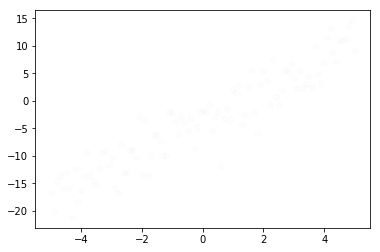

In [3]:
plt.scatter(x, y, color="#f44336", alpha=0.01)
plt.show()

### 批量梯度下降法时间性能测试

In [4]:
def J(theta, X_b, y):
    try:
        return np.norm(y - X_b.dot(theta))
    except:
        return float('inf')

def dJ(theta, X_b, y):
    try:
        return X_b.T.dot(X_b.dot(theta) - y) * 2. / y.shape[0]
    except:
        return float('inf')

In [5]:
def gradient_descent(X_b, y, initial_theta, eta=0.01, epsilon=1e-8, n_iters_max=1e4):
    
    theta = initial_theta
    n_iters = 0
    previous_J = J(theta, X_b, y)
    
    while n_iters < n_iters_max:
        gradient = dJ(theta, X_b, y)
        theta -= eta * gradient
        current_J = J(theta, X_b, y)
        
        if np.abs(current_J - previous_J) < epsilon:
            break
        
        previous_J = current_J
        n_iters += 1
    
    return theta

In [6]:
X = x.reshape(-1, 1)
X_b = np.hstack([np.ones((y.shape[0], 1)), X])
initial_theta = np.zeros((X_b.shape[1]))

In [7]:
%%time
theta = gradient_descent(X_b, y, initial_theta, eta=0.01)
print(theta)

[-3.5310332   2.76974526]
CPU times: user 104 ms, sys: 108 µs, total: 104 ms
Wall time: 101 ms


### 批量梯度下降法时间性能测试

In [8]:
def dJ_sgd(theta, X_b_i, y_i):
    try:
        return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)
    except:
        return float('inf')
def sgd(X_b, y, initial_theta, n_iters=50):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    t = 0
    for k in range(n_iters):
        indexes = np.random.permutation(X_b.shape[0])
        for l in indexes:
            X_b_i, y_i = X_b[l], y[l]
            gradient = dJ_sgd(theta, X_b_i, y_i)
            theta -= learning_rate(t) * gradient
            t += 1
#         print(theta)
        
    return theta

In [9]:
%%time
theta = sgd(X_b, y, initial_theta)
print(theta)

[-3.52184366  2.7140666 ]
CPU times: user 30.2 ms, sys: 4.44 ms, total: 34.7 ms
Wall time: 30.1 ms
